In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import seaborn as sns

## Importing all the Dataframes

##### Importing movies_df

In [8]:
# Path to the movies data file
movies_file = "../ml-100k/u.item"

# Read the data using pandas
movies_df = pd.read_csv(
    movies_file,
    sep="|",
    encoding="latin-1",
    names=["movie_id", "movie_title", "release_date", "video_release_date", "imdb_url", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"],
)

print(movies_df.shape)
# Print the first 5 rows of the data
display(movies_df.head())

# Get some descriptive statistics of the data
display(movies_df.describe())

# Access specific movies by their ID
movie_by_id = movies_df[movies_df["movie_id"] == 1]
display(movie_by_id)

# Filter movies by genre
comedy_movies = movies_df[movies_df["Comedy"] == 1]
display(comedy_movies.head())


# ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
# movies_df = pd.read_csv('ml-latest-small/movies.csv')
# tags_df = pd.read_csv('ml-latest-small/tags.csv')

(1682, 24)


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,13,Mighty Aphrodite (1995),30-Oct-1995,NaN,http://us.imdb.com/M/title-exact?Mighty%20Aphr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,French Twist (Gazon maudit) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Gazon%20maudi...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##### Importing ratings_df

In [9]:
column_names=['user_id','movie_id','rating','timestamp']
ratings_df = pd.read_csv('../ml-100k/u.data',sep='\t',names=column_names)

## Exploratory Data Analysis

In [10]:
for df in [ratings_df, movies_df]:
    display(df.head())
    print("*"*100)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


****************************************************************************************************


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


****************************************************************************************************


In [11]:
ratings_df

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [12]:
print("Unique users: ", ratings_df.user_id.nunique())
print("Unique movies: ", ratings_df.movie_id.nunique())
print("Average rating: ", ratings_df.rating.mean())
print("Average rating per user: ", ratings_df.groupby('user_id').rating.mean().mean())
print("Average rating per movie: ", ratings_df.groupby('movie_id').rating.mean().mean())

Unique users:  943
Unique movies:  1682
Average rating:  3.52986
Average rating per user:  3.5881911071848003
Average rating per movie:  3.076044508325179


#### Number of movies per rating

<Axes: >

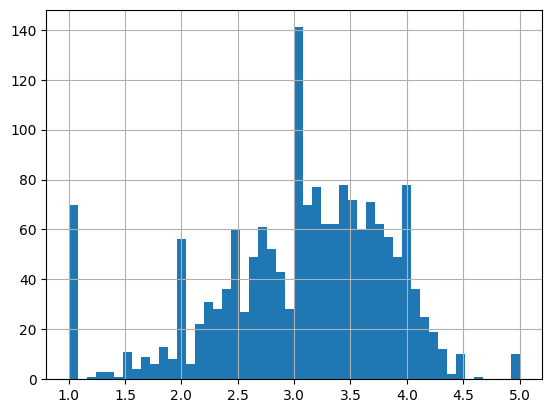

In [13]:
# Number of movies per rating
ratings_df.groupby('movie_id').rating.mean().hist(bins=50)

In [14]:
# Calculate mean, count, and Bayesian average for each movie
ratings_count = ratings_df.groupby('movie_id').rating.count()
ratings_mean = ratings_df.groupby('movie_id').rating.mean()
C = ratings_mean.mean()
m = ratings_count.quantile(0.5)
bayesian_avg = ((ratings_count * ratings_mean) + (m * C)) / (ratings_count + m)

# Create a DataFrame with mean, count, and Bayesian average
movie_stats = pd.DataFrame({'mean_rating': ratings_mean, 'count': ratings_count, 'bayesian_avg': bayesian_avg})

# Merge with movies_df to include movie details
movie_stats = pd.merge(movie_stats, movies_df, on='movie_id')

# Sort by Bayesian average in ascending order
lowest_rated = movie_stats.sort_values('bayesian_avg', ascending=True)
display(lowest_rated.head(10))

# Sort by Bayesian average in descending order
highest_rated = movie_stats.sort_values('bayesian_avg', ascending=False)
display(highest_rated.head(10))

,movie_id,mean_rating,count,bayesian_avg,movie_title,release_date,video_release_date,imdb_url,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
687,688,1.840909,44,2.310608,Leave It to Beaver (1997),22-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Leave+It+To+B...,0,0,...,0,0,0,0,0,0,0,0,0,0
423,424,1.315789,19,2.348983,Children of the Corn: The Gathering (1996),01-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Children%20of...,0,0,...,0,0,1,0,0,0,0,0,0,0
889,890,1.953488,43,2.386474,Mortal Kombat: Annihilation (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Mortal+Kombat...,0,1,...,0,0,0,0,0,0,0,0,0,0
456,457,1.740741,27,2.408393,Free Willy 3: The Rescue (1997),08-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Free+Willy+3%...,0,0,...,0,0,0,0,0,0,0,0,0,0
742,743,1.948718,39,2.409897,"Crow: City of Angels, The (1996)",30-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Crow%3A%20Cit...,0,1,...,0,0,0,0,0,0,0,1,0,0
686,687,2.188406,69,2.438054,McHale's Navy (1997),18-Apr-1997,NaN,http://us.imdb.com/M/title-exact?McHale's%20Na...,0,0,...,0,0,0,0,0,0,0,0,1,0
367,368,1.903226,31,2.449193,Bio-Dome (1996),01-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Bio-Dome%20(1...,0,0,...,0,0,0,0,0,0,0,0,0,0
930,931,2.157895,57,2.453014,"Island of Dr. Moreau, The (1996)",23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Island%20of%2...,0,0,...,0,0,0,0,0,0,1,1,0,0
1214,1215,1.933333,30,2.474618,Barb Wire (1996),03-May-1996,NaN,http://us.imdb.com/M/title-exact?Barb%20Wire%2...,0,1,...,0,0,0,0,0,0,1,0,0,0
119,120,2.238806,67,2.479289,Striptease (1996),28-Jun-1996,NaN,http://us.imdb.com/M/title-exact?Striptease%20...,0,0,...,0,0,0,0,0,0,0,0,0,0


,movie_id,mean_rating,count,bayesian_avg,movie_title,release_date,video_release_date,imdb_url,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
317,318,4.466443,298,4.350933,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
63,64,4.445230,283,4.325978,"Shawshank Redemption, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Shawshank%20R...,0,0,...,0,0,0,0,0,0,0,0,0,0
482,483,4.456790,243,4.318716,Casablanca (1942),01-Jan-1942,NaN,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,...,0,0,0,0,0,1,0,0,1,0
49,50,4.358491,583,4.301727,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,...,0,0,0,0,0,1,1,0,1,0
11,12,4.385768,267,4.265487,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,...,0,0,0,0,0,0,0,1,0,0
602,603,4.387560,209,4.237514,Rear Window (1954),01-Jan-1954,NaN,http://us.imdb.com/M/title-exact?Rear%20Window...,0,0,...,0,0,0,0,1,0,0,1,0,0
407,408,4.491071,112,4.216210,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,0,0,0,0,1,0,0
97,98,4.289744,390,4.211159,"Silence of the Lambs, The (1991)",01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Silence%20of%...,0,0,...,0,0,0,0,0,0,0,1,0,0
126,127,4.283293,413,4.209212,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,...,0,0,0,0,0,0,0,0,0,0
168,169,4.466102,118,4.207263,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Making Genres by count Dataframe

In [15]:
genre_counts = movies_df.iloc[:, 5:].sum()
genre_counts_df = pd.DataFrame(genre_counts, columns=['count'])
genre_counts_df.reset_index(inplace=True)

genre_counts_df.rename(columns={'index': 'genre'}, inplace=True)
genre_counts_df

,genre,count
0,unknown,2
1,Action,251
2,Adventure,135
3,Animation,42
4,Children's,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


#### Genres by count

<Axes: >

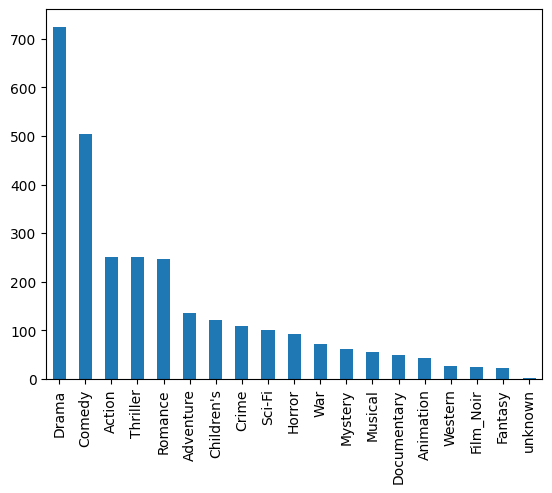

In [16]:
# movies per genre ascending order
movies_df.iloc[:, 5:].sum().sort_values(ascending=False).plot(kind='bar')

In [17]:
def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movie_id, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['user_id'].nunique()
    N = df['movie_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movie_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movie_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [movie_mapper[i] for i in df['movie_id']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings_df)

In [18]:
# evaluate the sparsity of X
def calculate_sparsity(X):
    """
    This function calculates sparsity percentage of a matrix.
    
    Args:
        X: rating matrix
    
    Returns:
        sparsity: a float number between 0 and 1 representing the sparsity percentage
    """
    sparsity = float(len(X.nonzero()[0]))
    sparsity /= (X.shape[0] * X.shape[1])
    sparsity *= 100
    return sparsity

calculate_sparsity(X)

6.304669364224531

In [19]:
# Get most active users and number of ratings
print("Number of movies most active user rated", X.getnnz(axis=1).max())
print("Number of movies least active user rated", X.getnnz(axis=1).min())

print("Most active user", X.getnnz(axis=1).argmax())
print("Lest active user", X.getnnz(axis=1).argmin())


# most rated movies
print("Number of ratings most rated movie got", X.getnnz(axis=0).max())
print("Number of ratings least rated movie got", X.getnnz(axis=0).min())

Number of movies most active user rated 737
Number of movies least active user rated 20
Most active user 404
Lest active user 18
Number of ratings most rated movie got 583
Number of ratings least rated movie got 1


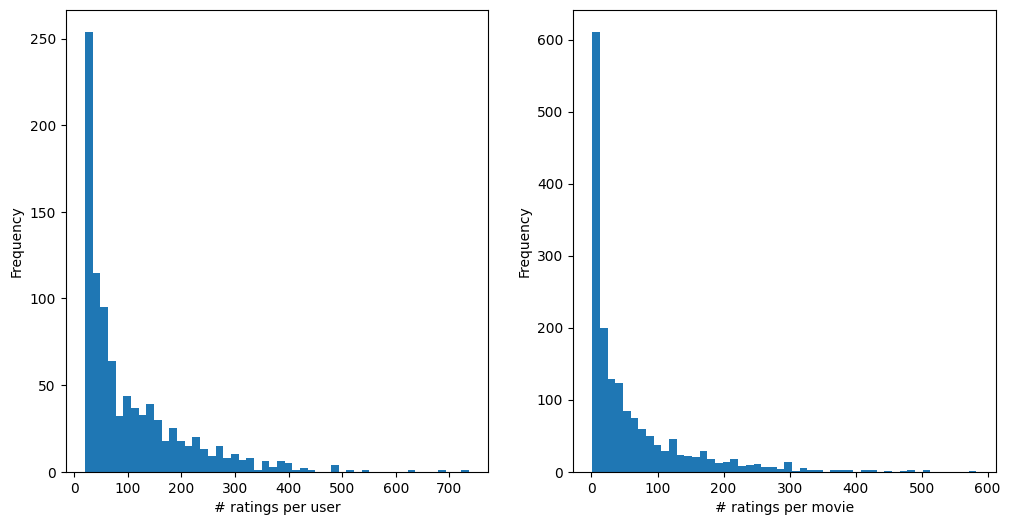

In [20]:
# plot number of ratings per user
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X.getnnz(axis=1), bins=50)
plt.xlabel('# ratings per user')
plt.ylabel('Frequency')

# plot number of ratings per movie
plt.subplot(1, 2, 2)
plt.hist(X.getnnz(axis=0), bins=50)
plt.xlabel('# ratings per movie')
plt.ylabel('Frequency')
plt.show()


## User-item Recommendations with k-Nearest Neighbors

##### User Based

In [21]:
from surprise import Dataset, Reader, KNNBasic

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'rating']], reader)

# Build the user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(k=10, sim_options=sim_options)

# Train the model
trainset = data.build_full_trainset()
model.fit(trainset)

# Get recommendations for a target user
target_user_id = 123
target_user_items = trainset.ur[trainset.to_inner_uid(target_user_id)]
target_user_unrated_items = [item_id for item_id in trainset.all_items() if item_id not in target_user_items]

predictions = []
for item_id in target_user_unrated_items:
    if item_id in movies_df['movie_id'].values:
        movie_title = movies_df.loc[movies_df['movie_id'] == item_id, 'movie_title'].values[0]
        predicted_rating = model.predict(target_user_id, item_id).est
        predictions.append((item_id, movie_title, predicted_rating))

# Sort the predictions by rating in descending order
predictions.sort(key=lambda x: x[2], reverse=True)

# Get the top recommended items with movie names
top_k = 10
recommended_items = [(item_id, movie_title) for item_id, movie_title, _ in predictions[:top_k]]
recommended_items

Computing the cosine similarity matrix...
Done computing similarity matrix.


[(814, 'Great Day in Harlem, A (1994)'),
 (1189, 'Prefontaine (1997)'),
 (1201, 'Marlene Dietrich: Shadow and Light (1996) '),
 (1293, 'Star Kid (1997)'),
 (1467, 'Saint of Fort Washington, The (1993)'),
 (1536, 'Aiqing wansui (1994)'),
 (1599, "Someone Else's America (1995)"),
 (1653, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (1122, 'They Made Me a Criminal (1939)'),
 (1500, 'Santa with Muscles (1996)')]

##### Item Based

In [22]:
from surprise import Dataset, Reader, KNNBasic

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'rating']], reader)

# Build the item-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(k=10, sim_options=sim_options)

# Train the model
trainset = data.build_full_trainset()
model.fit(trainset)

# Get recommendations for a target user
target_user_id = 123
target_user_items = trainset.ur[trainset.to_inner_uid(target_user_id)]
target_user_unrated_items = [item_id for item_id in trainset.all_items() if item_id not in target_user_items]

predictions = []
for item_id in target_user_unrated_items:
    if item_id in movies_df['movie_id'].values:
        movie_title = movies_df.loc[movies_df['movie_id'] == item_id, 'movie_title'].values[0]
        predicted_rating = model.predict(target_user_id, item_id).est
        predictions.append((item_id, movie_title, predicted_rating))
    else:
        movie_title = "Unknown"  # Set a default movie title if the ID is not found
        predicted_rating = model.predict(target_user_id, item_id).est
        predictions.append((item_id, movie_title, predicted_rating))

# Sort the predictions by rating in descending order
predictions.sort(key=lambda x: x[2], reverse=True)

# Get the top recommended items with movie names
top_k = 10
recommended_items = [(item_id, movie_title) for item_id, movie_title, _ in predictions[:top_k]]
recommended_items

Computing the cosine similarity matrix...
Done computing similarity matrix.


[(353, 'Deep Rising (1998)'),
 (1034, 'Quest, The (1996)'),
 (894, 'Home Alone 3 (1997)'),
 (1067, 'Bottle Rocket (1996)'),
 (1013, 'Anaconda (1997)'),
 (1209, 'Mixed Nuts (1994)'),
 (937, 'Thousand Acres, A (1997)'),
 (1091, "Pete's Dragon (1977)"),
 (504, 'Bonnie and Clyde (1967)'),
 (870, 'Touch (1997)')]

In [23]:
movies_df['movie_id'].values

array([   1,    2,    3, ..., 1680, 1681, 1682])

## Item-Item Recommendations

In [24]:
from surprise import Dataset, Reader, KNNBasic

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'rating']], reader)

# Build the item-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(k=10, sim_options=sim_options)

# Train the model
trainset = data.build_full_trainset()
model.fit(trainset)

# Get recommendations for a given movie
target_movie_name = "Toy Story (1995)"
target_movie_id = movies_df.loc[movies_df['movie_title'] == target_movie_name, 'movie_id'].values[0]

similar_movies = model.get_neighbors(target_movie_id, k=10)
recommended_movies = [(movies_df.loc[movies_df['movie_id'] == movie_id, 'movie_title'].values[0]) for movie_id in similar_movies]

recommended_movies

Computing the cosine similarity matrix...
Done computing similarity matrix.


['Super Mario Bros. (1993)',
 'Meet Me in St. Louis (1944)',
 'So Dear to My Heart (1949)',
 'Seventh Seal, The (Sjunde inseglet, Det) (1957)',
 'Conan the Barbarian (1981)',
 'Leave It to Beaver (1997)',
 'Relative Fear (1994)',
 'Thirty-Two Short Films About Glenn Gould (1993)',
 'That Thing You Do! (1996)',
 'Hearts and Minds (1996)']